In [1]:
# Importing the libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv('Boston_Housing_Dataset.csv')
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRIM :  per capita crime rate by town
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS : proportion of non-retail business acres per town
- CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX : nitric oxides concentration (parts per 10 million)
- RM : average number of rooms per dwelling
- AGE : proportion of owner-occupied units built prior to 1940
- DIS : weighted distances to five Boston employment centres
- RAD : index of accessibility to radial highways
- TAX : full-value property-tax rate per 10,000usd
- PTRATIO : pupil-teacher ratio by town
- B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT : % lower status of the population

In [3]:
#Check the shape of dataframe
df.shape

(506, 15)

In [4]:
df.sample()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
232,232,0.57529,0.0,6.2,0.0,0.507,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47,41.7


In [5]:
##  fetch the columns names from the data
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [6]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

-- removing the column named `Unnamed` from the dataset.

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
## to  get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
# Check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# # basic statistical summary(descriptive statistics)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [13]:
plt.style.use('fivethirtyeight')

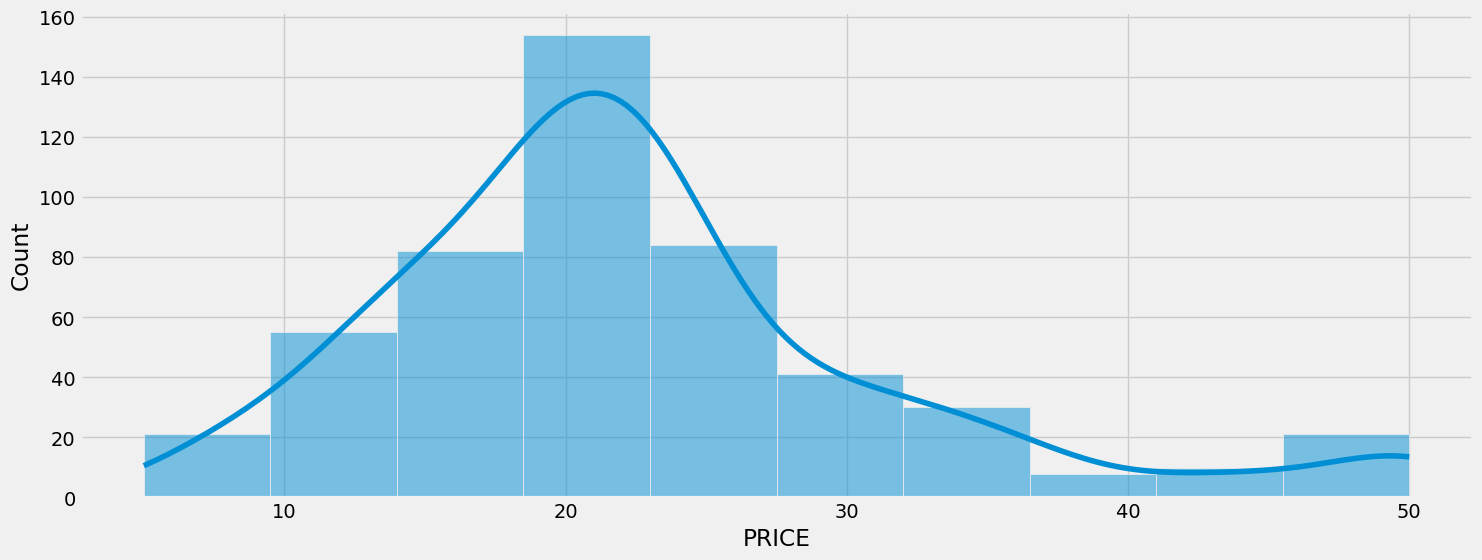

In [14]:
plt.subplots(figsize =  (16,6))
sns.histplot(df['PRICE'],bins = 10, kde= True)
plt.show()

- On an average median price moves around 22k USD
- Distribution is slightly right skewed and there are close to ~20-30 housed in the price range of 40-50K USD

In [15]:
df['PRICE'].mean()

22.532806324110677

In [16]:
select_house_more_than_45kUSD = df[df['PRICE']>45]

In [17]:
select_house_more_than_45kUSD

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
228,0.29819,0.0,6.20,0.0,0.5040,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92,46.7


In [18]:
df['RM'].mean()

6.284634387351779

In [19]:
select_house_more_than_45kUSD['RM'].mean()

7.608772727272726

 - Key takeaway is number of rooms per house seems to be the key driving factor in house prices

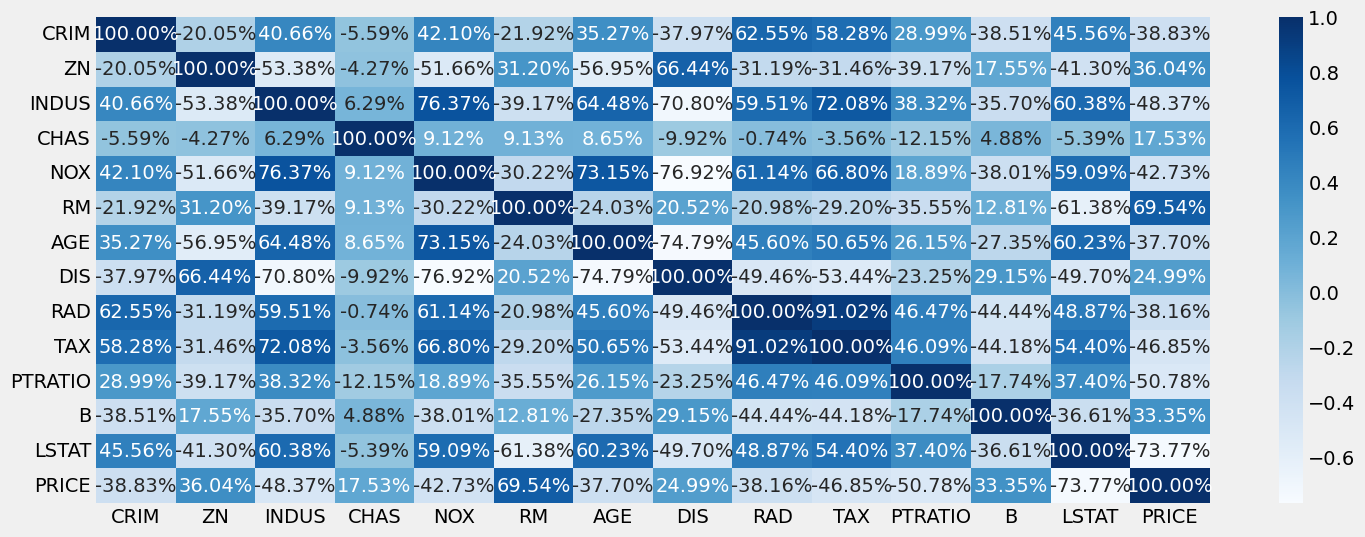

In [20]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt = '.2%')
plt.show()

- The number of rooms per house `(Room per house)` and the percentage of lower status population `(LSTAT) seem to be the primary factors influencing house prices.

## Import libraries from  Sklearn

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
X = df.iloc[:,:-1]

In [23]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [24]:
y = df['PRICE']

In [25]:
y.shape

(506,)

## Split the `X` and `y` using 80% for training and 20% for testing

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.20, random_state= 2)

In [27]:
X_train.shape

(404, 13)

In [28]:
X_test.shape

(102, 13)

In [29]:
y_test.shape

(102,)

## Linear Regression

## Training the model


In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression()

## Validating the model

In [32]:
y_predicted = model.predict(X_test)

In [33]:
y_predicted.shape

(102,)

## Measure the model performance

In [34]:
R_squared = r2_score(y_predicted,y_test)

In [35]:
R_squared

0.7579300660483749

In [36]:
Mean_absolute_Error = mean_absolute_error(y_predicted,y_test) 

In [37]:
Mean_absolute_Error

3.113043746893449

In [38]:
mean_squared_error = mean_squared_error(y_predicted,y_test)

In [39]:
mean_squared_error

18.49542012244852

In [40]:
rmse = np.sqrt(mean_squared_error)

In [41]:
rmse

4.30063020061578

In [42]:
Adj_r2 = 1-(1-R_squared)*len(y_train-1)/(len(y_train)-X_train.shape[1]-1)
Adj_r2

0.7492403761116498

## Key Evaluation Metrics

In [43]:
print('MAE:', Mean_absolute_Error)
print('MSE:', mean_squared_error)
print('RMSE:', rmse)
print('R^2:', R_squared)
print('Adjusted_R^2:', Adj_r2)

MAE: 3.113043746893449
MSE: 18.49542012244852
RMSE: 4.30063020061578
R^2: 0.7579300660483749
Adjusted_R^2: 0.7492403761116498


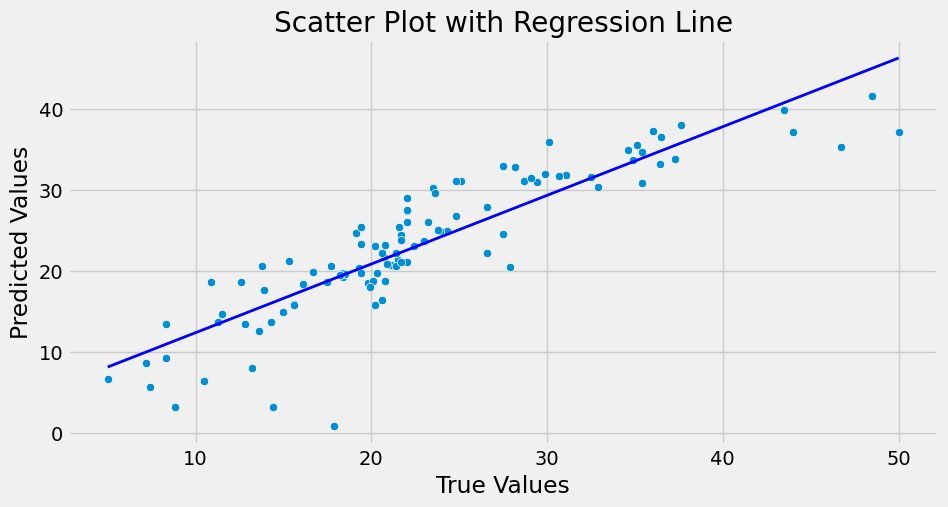

In [44]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_predicted)
sns.regplot(x=y_test, y=y_predicted, scatter = False, color='blue',line_kws={"linewidth": 2}, ci = None)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line')
plt.show()

## Decision tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

## Training the model

In [46]:
df = DecisionTreeRegressor()

In [47]:
df.fit(X_train,y_train)

DecisionTreeRegressor()

## Validating the model

In [48]:
y_pred_dt= df.predict(X_test)

## Measure the model performance

In [49]:
df_r2 = r2_score(y_pred_dt,y_test)

In [50]:
df_r2

0.7021016362389367

In [51]:
df_MAE = mean_absolute_error(y_pred_dt,y_test)

In [52]:
df_MAE

3.6225490196078427

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
df_MSE = mean_squared_error(y_pred_dt,y_test)

In [55]:
df_MSE

24.89872549019607

In [56]:
df_RMSE = np.sqrt(df_MSE)

In [57]:
df_RMSE

4.98986227166603

In [58]:
df_adj_r2 =1-(1-df_r2)*len(y_train-1)/(len(y_train)-X_train.shape[1]-1)
df_adj_r2

0.6914078488218729

## Key Evaluation Metrics

In [59]:
print('MAE:', df_MAE)
print('MSE:', df_MSE)
print('RMSE:', df_RMSE)
print('R^2:', df_r2)
print('Adjusted_R^2:', df_adj_r2)

MAE: 3.6225490196078427
MSE: 24.89872549019607
RMSE: 4.98986227166603
R^2: 0.7021016362389367
Adjusted_R^2: 0.6914078488218729


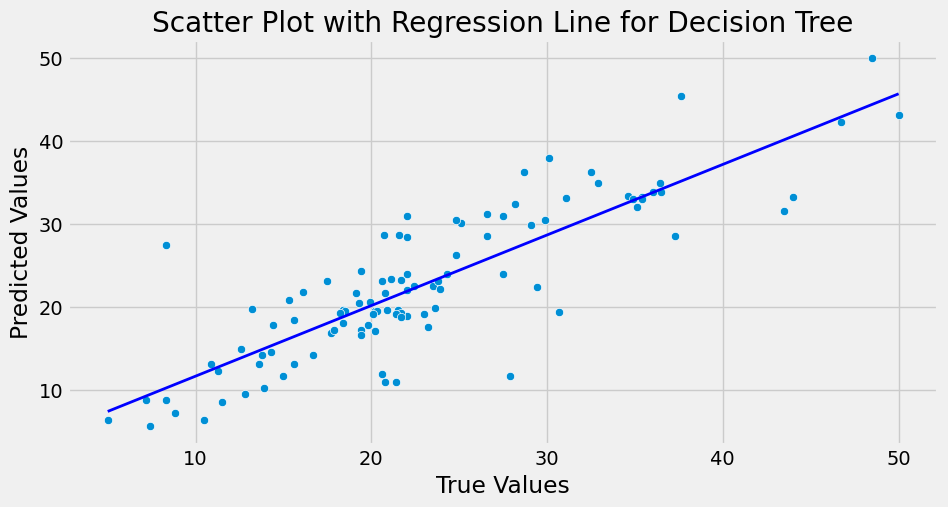

In [60]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_dt)
sns.regplot(x=y_test, y=y_pred_dt, scatter = False, color='blue',line_kws={"linewidth": 2}, ci = None)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line for Decision Tree')
plt.show()

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

## Training the model

In [62]:
rf = RandomForestRegressor()

In [63]:
rf.fit(X_train,y_train)

RandomForestRegressor()

## Validating the model

In [64]:
rf_y_pred = rf.predict(X_test)

## Measure the model performance

In [65]:
rf_r2 = r2_score(rf_y_pred,y_test)

In [66]:
rf_r2

0.8807209990442294

- 86.82 % of the variance in the house price can be predicted by the independent variables whereas rest of the 13.18 % cannot be explained.
- R^2 measures the proportion of variance in the price which is predictable. Higher R^2 means better fit of the model however it doesn't convey information about the magnitude of the errors

In [67]:
rf_MAE = mean_absolute_error(rf_y_pred,y_test)

In [68]:
rf_MAE

2.1263039215686286

In [69]:
rf_MSE = mean_squared_error(rf_y_pred,y_test)

In [70]:
rf_MSE

8.935805774509808

In [71]:
rf_RMSE = np.sqrt(rf_MSE)

In [72]:
rf_RMSE

2.9892818158396857

- RMSE provides a measure of the average magnitude of the errors made by the model in absolute sense

In [73]:
rf_adj_r2 = 1-(1-rf_r2)*len(y_train-1)/(len(y_train)-X_train.shape[1]-1)

In [74]:
rf_adj_r2

0.8764391887535095

- Since we have more than one variable, we have used adjusted R2 to measure the proportion of variance 
- This value of Adjusted R² indicates that almost 86.34 % of training data is being predicted correctly with all the independent variables whereas the rest of the 13.66 % of data cannot be explained.

## Key Evaluation Metrics

In [75]:
print('MAE:', rf_MAE)
print('MSE:', rf_MSE)
print('RMSE:', rf_RMSE)
print('R^2:', rf_r2)
print('Adjusted_R^2:', rf_adj_r2)

MAE: 2.1263039215686286
MSE: 8.935805774509808
RMSE: 2.9892818158396857
R^2: 0.8807209990442294
Adjusted_R^2: 0.8764391887535095


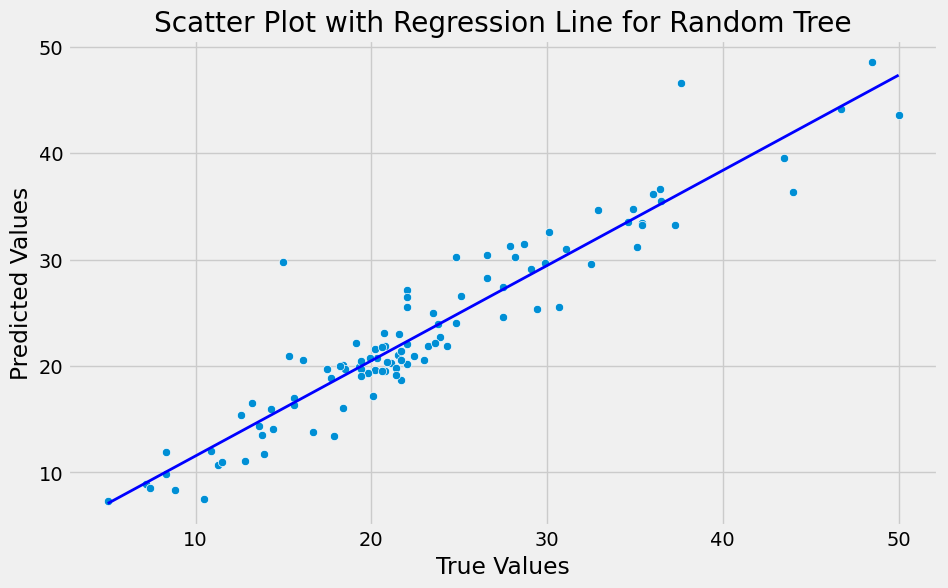

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_y_pred)
sns.regplot(x=y_test, y=rf_y_pred, scatter = False, color='blue', line_kws={"linewidth": 2}, ci = None)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line for Random Tree')
plt.show()

In [77]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'R-squared Score': [Adj_r2* 100, df_adj_r2*100, rf_adj_r2*100]})
models.sort_values(by='R-squared Score', ascending=False)


,Model,R-squared Score
2,Random Forest,87.643919
0,Linear Regression,74.924038
1,Decision Tree,69.140785


## After comparing the performance of different models on the test set, it's evident that the Random Forest regressor achieves superior results compared to the other models. Therefore, we have chosen the Random Forest model as our final model for predicting house prices.